# Visualization using Pandas and Matplotlib - Introduction 2

Pandas plotting reference: https://pandas.pydata.org/pandas-docs/stable/reference/frame.html#plotting

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('telecom_churn.csv')
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [3]:
df['churn'] = df['churn'].astype('int32')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

### Histogram

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D749EF9508>,
      dtype=object)

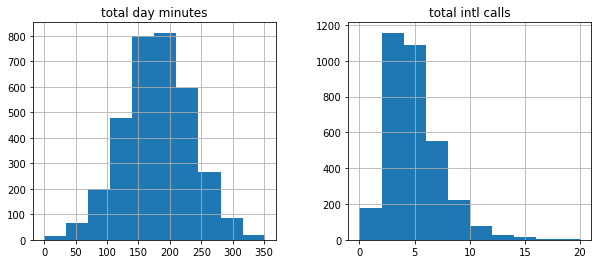

In [5]:
features = ['total day minutes', 'total intl calls']
df[features].hist(figsize=(10,4))

### kde:
https://en.wikipedia.org/wiki/Kernel_density_estimation

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D74A8318C8>,
      dtype=object)

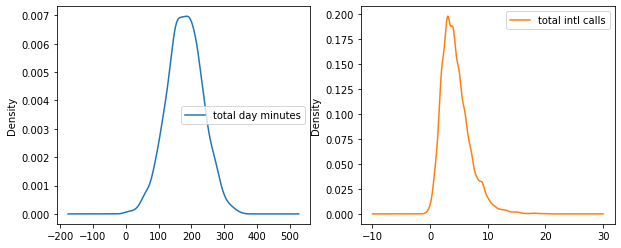

In [6]:
df[features].plot.density(subplots=True, sharex=False, layout=(1,2),figsize=(10,4))

### Box & Violin Plots

total day minutes       AxesSubplot(0.125,0.125;0.352273x0.755)
total intl calls     AxesSubplot(0.547727,0.125;0.352273x0.755)
dtype: object

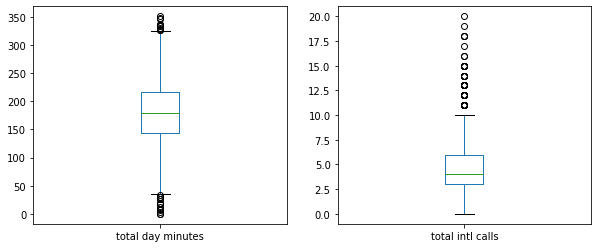

In [7]:
df[features].plot.box(subplots=True, sharex=False, layout=(1,2),figsize=(10,4))

#### Using seaborn

Seaborn API: https://seaborn.pydata.org/api.html

In [4]:
import seaborn as sns
from matplotlib import pyplot as plt

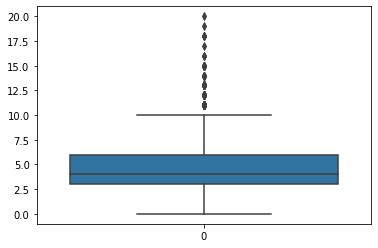

In [5]:
sns.boxplot(data=df['total intl calls'])

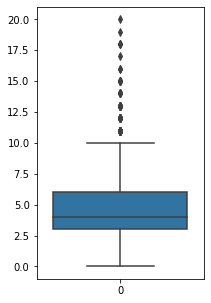

In [10]:
fig, ax = plt.subplots(figsize=(3,5))
sns.boxplot(data=df['total intl calls'], ax=ax)

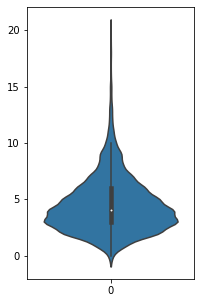

In [11]:
plt.figure(figsize=(3,5))
sns.violinplot(data=df['total intl calls'])

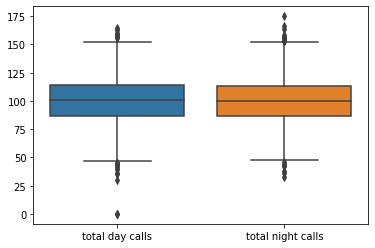

In [12]:
sns.boxplot(data=df[['total day calls','total night calls']])

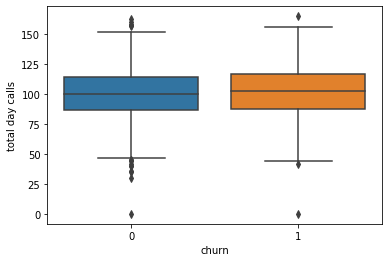

In [13]:
sns.boxplot(data=df,y='total day calls',x='churn')

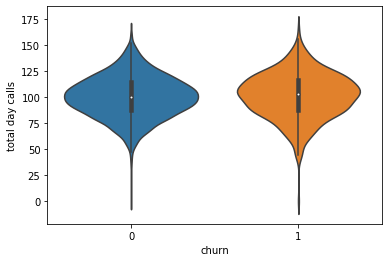

In [14]:
sns.violinplot(data=df,y='total day calls',x='churn')

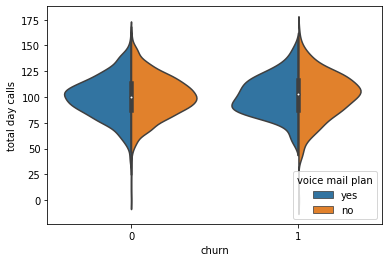

In [15]:
sns.violinplot(data=df,hue='voice mail plan', y='total day calls',x='churn',split=True)

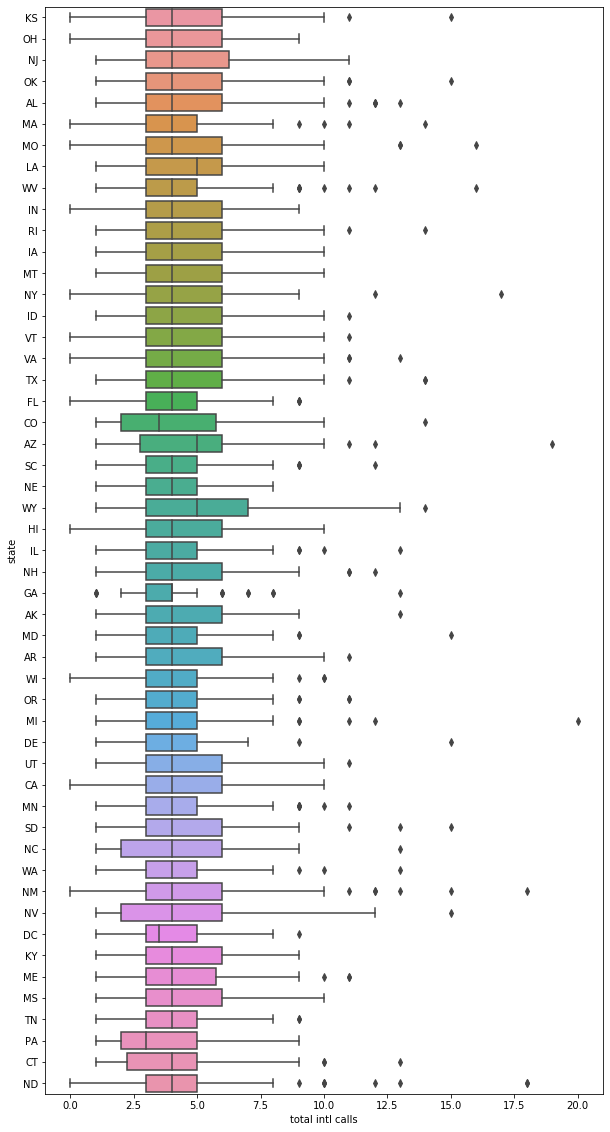

In [16]:
fig, ax = plt.subplots(figsize=(10,20))
sns.boxplot(data=df,x='total intl calls', y='state',ax=ax)

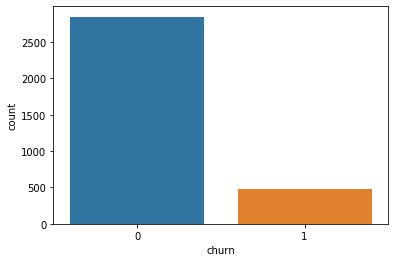

In [17]:
sns.countplot(data=df,x='churn')

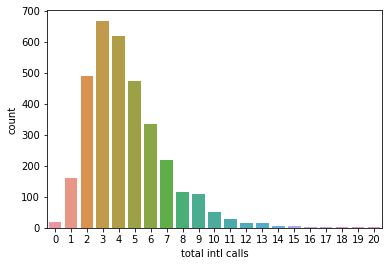

In [18]:
sns.countplot(data=df, x='total intl calls')

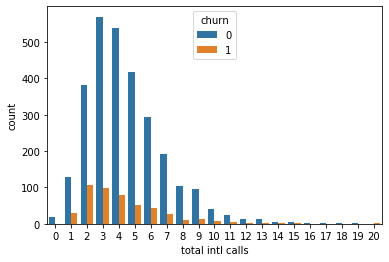

In [19]:
sns.countplot(data=df, x='total intl calls',hue='churn')

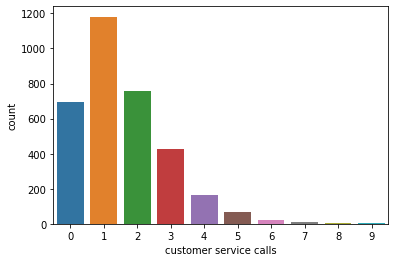

In [20]:
sns.countplot(data=df, x='customer service calls')

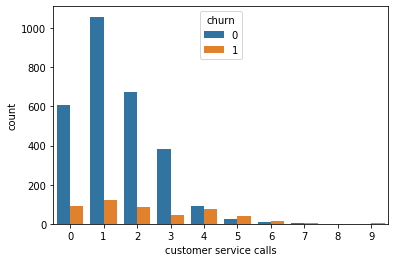

In [21]:
sns.countplot(data=df, x='customer service calls',hue='churn')

#### Correlation Matrix

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [23]:
corr = df.loc[:,'number vmail messages':'customer service calls'].corr()
corr

,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
number vmail messages,1.000000,0.000778,-0.009548,0.000776,0.017562,-0.005864,0.017578,0.007681,0.007123,0.007663,0.002856,0.013957,0.002884,-0.013263
total day minutes,0.000778,1.000000,0.006750,1.000000,0.007043,0.015769,0.007029,0.004323,0.022972,0.004300,-0.010155,0.008033,-0.010092,-0.013423
total day calls,-0.009548,0.006750,1.000000,0.006753,-0.021451,0.006462,-0.021449,0.022938,-0.019557,0.022927,0.021565,0.004574,0.021666,-0.018942
total day charge,0.000776,1.000000,0.006753,1.000000,0.007050,0.015769,0.007036,0.004324,0.022972,0.004301,-0.010157,0.008032,-0.010094,-0.013427
total eve minutes,0.017562,0.007043,-0.021451,0.007050,1.000000,-0.011430,1.000000,-0.012584,0.007586,-0.012593,-0.011035,0.002541,-0.011067,-0.012985
total eve calls,-0.005864,0.015769,0.006462,0.015769,-0.011430,1.000000,-0.011423,-0.002093,0.007710,-0.002056,0.008703,0.017434,0.008674,0.002423
total eve charge,0.017578,0.007029,-0.021449,0.007036,1.000000,-0.011423,1.000000,-0.012592,0.007596,-0.012601,-0.011043,0.002541,-0.011074,-0.012987
total night minutes,0.007681,0.004323,0.022938,0.004324,-0.012584,-0.002093,-0.012592,1.000000,0.011204,0.999999,-0.015207,-0.012353,-0.015180,-0.009288
total night calls,0.007123,0.022972,-0.019557,0.022972,0.007586,0.007710,0.007596,0.011204,1.000000,0.011188,-0.013605,0.000305,-0.013630,-0.012802
total night charge,0.007663,0.004300,0.022927,0.004301,-0.012593,-0.002056,-0.012601,0.999999,0.011188,1.000000,-0.015214,-0.012329,-0.015186,-0.009277


see https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html

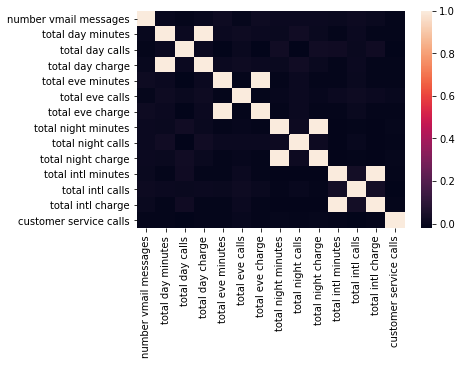

In [24]:
sns.heatmap(corr)

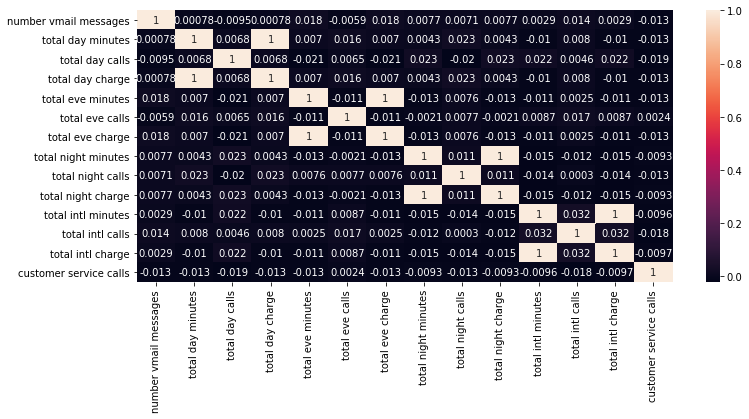

In [25]:
fig, ax = plt.subplots(figsize=(12,5))
sns.heatmap(corr,annot=True,ax=ax)

#### Scatter Plot

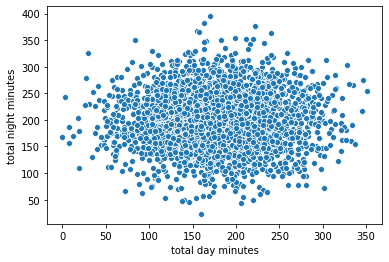

In [26]:
sns.scatterplot(data=df,x='total day minutes',y='total night minutes')

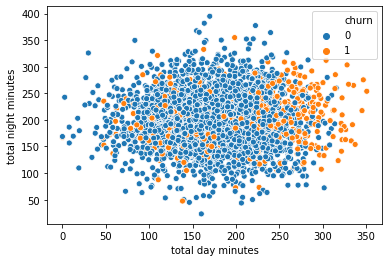

In [27]:
sns.scatterplot(data=df,x='total day minutes',y='total night minutes', hue='churn')

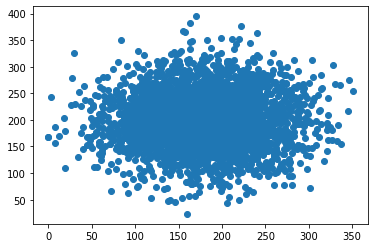

In [28]:
plt.scatter(df['total day minutes'],y=df['total night minutes'])

#### Jointplot

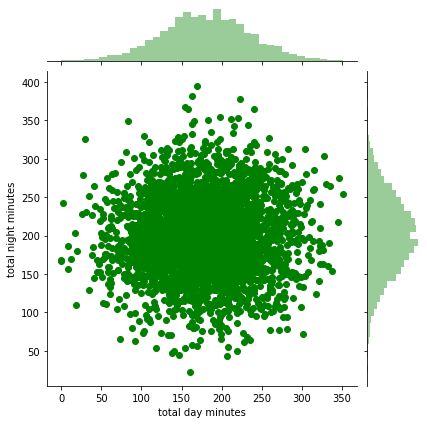

In [29]:
sns.jointplot(data=df,x='total day minutes',y='total night minutes', color='g')

#### Scatter Matrix

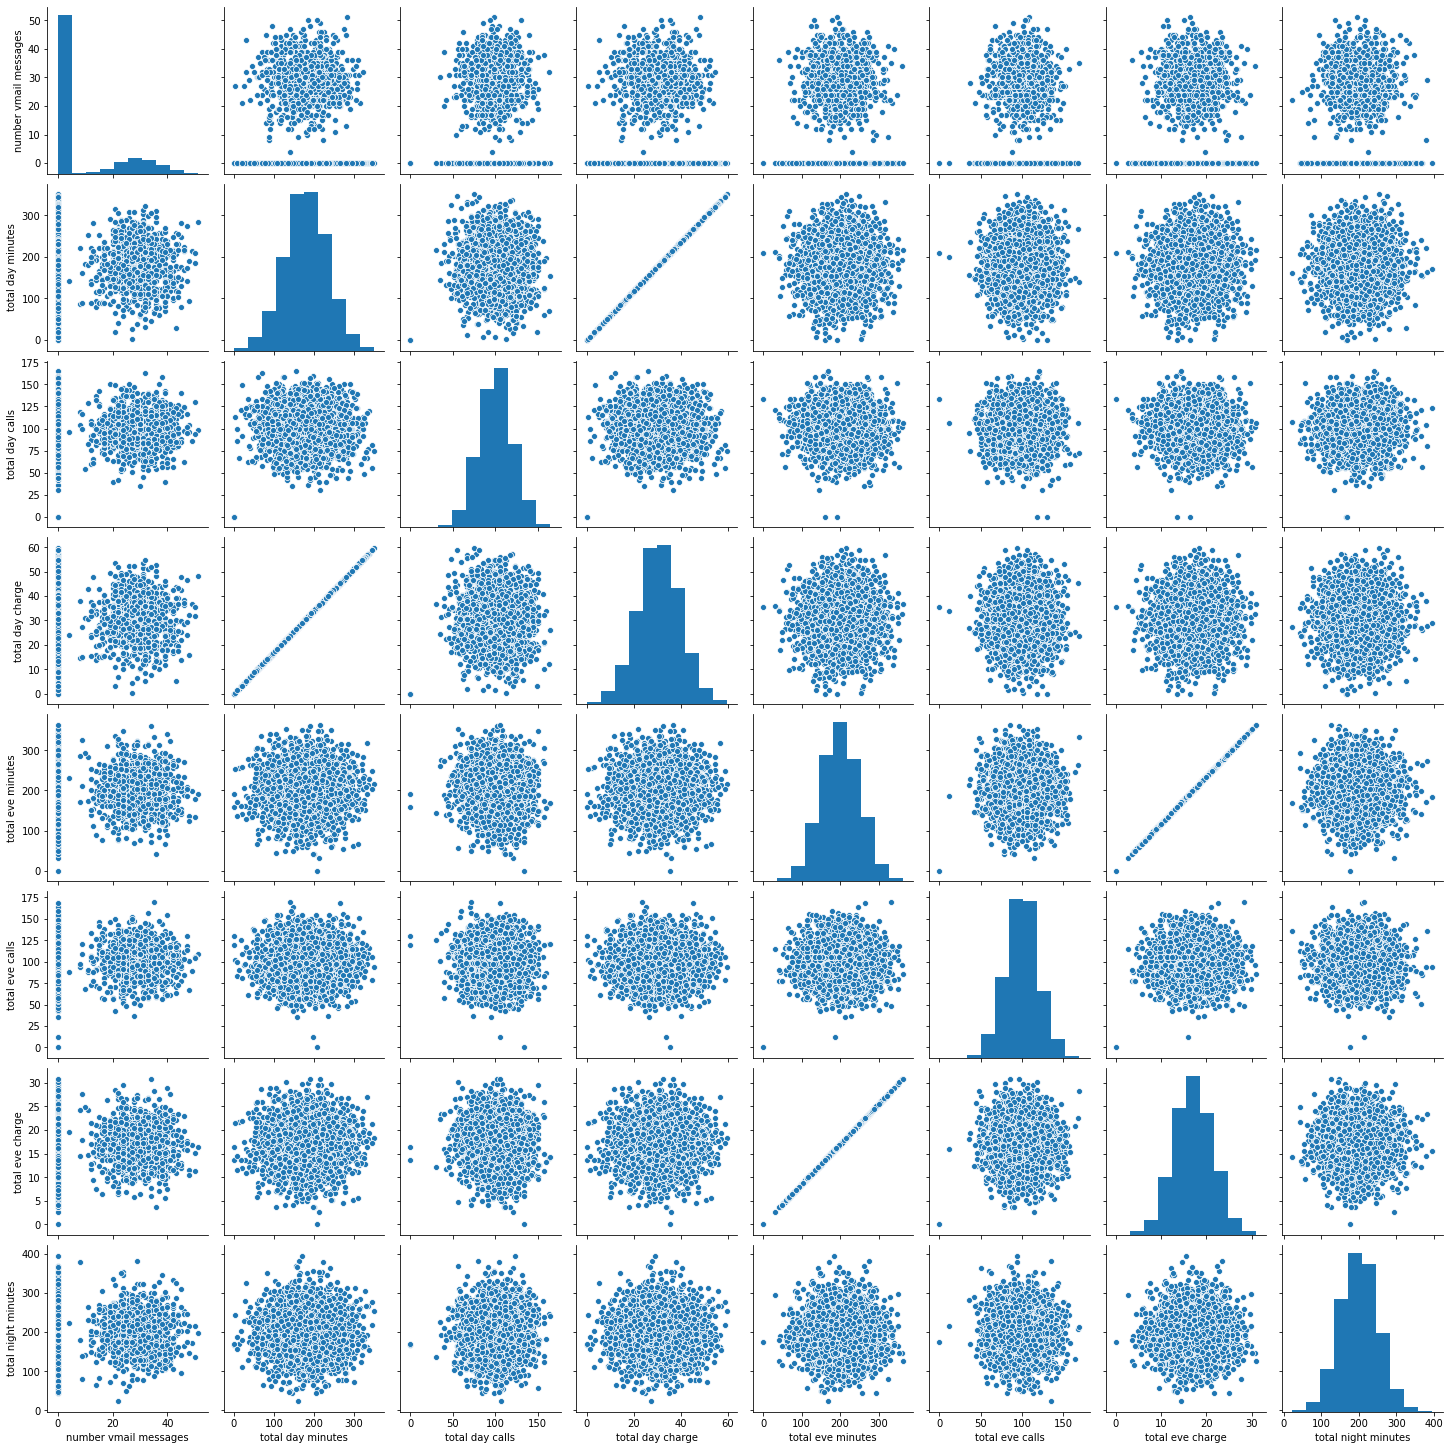

In [30]:
sns.pairplot(df.loc[:,'number vmail messages':'total night minutes'])

#### distplot

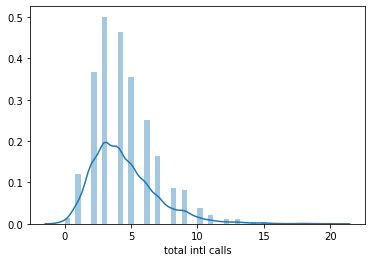

In [31]:
sns.distplot(df['total intl calls'])

#### Subplots

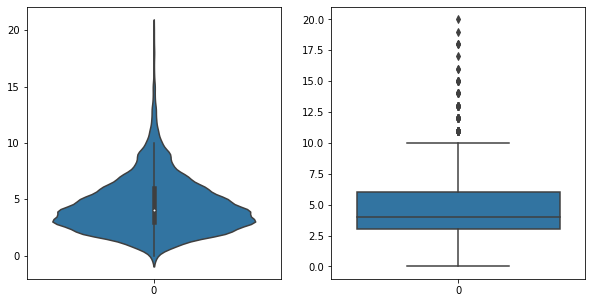

In [32]:
fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(10,5))
sns.violinplot(data=df['total intl calls'],ax=ax[0])
sns.boxplot(data=df['total intl calls'],ax=ax[1])

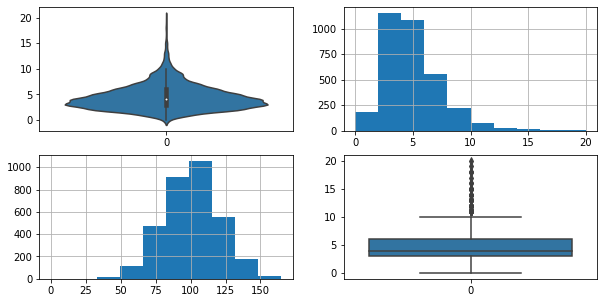

In [6]:
fig, ax = plt.subplots(nrows=2,ncols=2,figsize=(10,5))
sns.violinplot(data=df['total intl calls'],ax=ax[0,0])
sns.boxplot(data=df['total intl calls'],ax=ax[1,1])
df['total intl calls'].hist(ax=ax[0,1])
df['total day calls'].hist(ax=ax[1,0])